In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Malvika Saxena\\Downloads\\Test.csv")

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [4]:
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C
2626,467968,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7,A


In [5]:
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [6]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [7]:
df = pd.DataFrame(df)

print(df)

df.dropna(inplace=True)
print(df)

          ID  Gender Ever_Married  Age Graduated     Profession  \
0     458989  Female          Yes   36       Yes       Engineer   
1     458994    Male          Yes   37       Yes     Healthcare   
2     458996  Female          Yes   69        No            NaN   
3     459000    Male          Yes   59        No      Executive   
4     459001  Female           No   19        No      Marketing   
...      ...     ...          ...  ...       ...            ...   
2622  467954    Male           No   29        No     Healthcare   
2623  467958  Female           No   35       Yes         Doctor   
2624  467960  Female           No   53       Yes  Entertainment   
2625  467961    Male          Yes   47       Yes      Executive   
2626  467968  Female           No   43       Yes     Healthcare   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                 0.0            Low          1.0  Cat_6            B  
1                 8.0        Average          4.0  

In [8]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [9]:
df.shape

(2154, 11)

In [10]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2154.000000,2154.000000,2154.000000,2154.000000
mean,463496.744661,43.461467,2.551532,2.837047
std,2591.465156,16.761895,3.344917,1.566872
min,458989.000000,18.000000,0.000000,1.000000
25%,461282.250000,30.000000,0.000000,2.000000
50%,463535.000000,41.000000,1.000000,2.000000
75%,465705.750000,52.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [11]:
df['Segmentation'].value_counts()

A    692
D    631
B    450
C    381
Name: Segmentation, dtype: int64

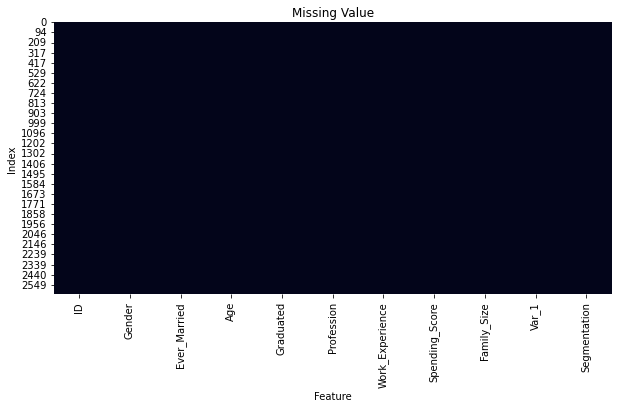

In [12]:
plt.subplots(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)
plt.xlabel('Feature')
plt.ylabel('Index')
plt.title('Missing Value')

plt.show()

D:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


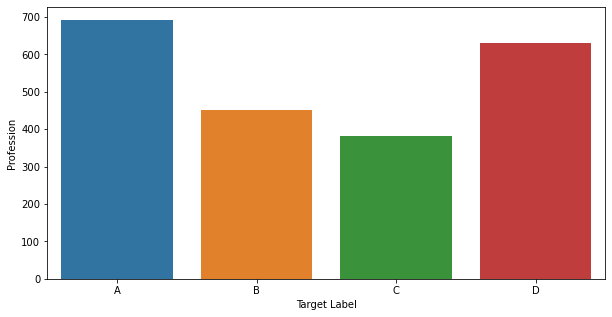

In [13]:
plt.subplots(figsize=(10,5))
sns.countplot(df['Segmentation'].sort_values())
plt.xlabel('Target Label')
plt.ylabel('Profession')

plt.show()

In [14]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [22]:
stats = df.select_dtypes(['float', 'int64']).drop(columns=['Age'])

In [23]:
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat M')ap', color='black', size='20

SyntaxError: invalid syntax (Temp/ipykernel_11304/1298138360.py, line 1)

In [24]:
df_final = pd.get_dummies(df)
df_final.head()

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,458989,36,0.0,1.0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
1,458994,37,8.0,4.0,0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
3,459000,59,11.0,2.0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
5,459003,47,0.0,5.0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
6,459005,61,5.0,3.0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


In [25]:
fi = df.Gender
fi

0       Female
1         Male
3         Male
5         Male
6         Male
         ...  
2621    Female
2622      Male
2623    Female
2625      Male
2626    Female
Name: Gender, Length: 2154, dtype: object

In [26]:
list(zip(df.columns, fi))

[('ID', 'Female'),
 ('Gender', 'Male'),
 ('Ever_Married', 'Male'),
 ('Age', 'Male'),
 ('Graduated', 'Male'),
 ('Profession', 'Female'),
 ('Work_Experience', 'Male'),
 ('Spending_Score', 'Male'),
 ('Family_Size', 'Male'),
 ('Var_1', 'Female'),
 ('Segmentation', 'Male')]

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf=RandomForestClassifier(n_estimators=100)

(array([], dtype=float64), [])

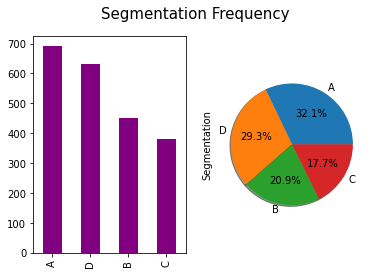

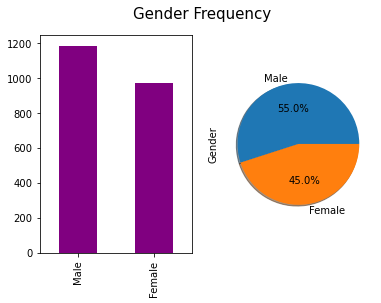

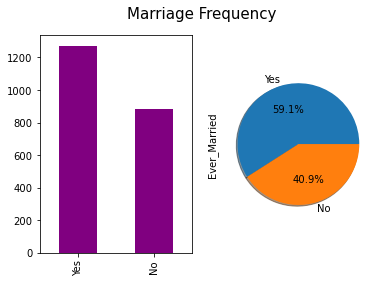

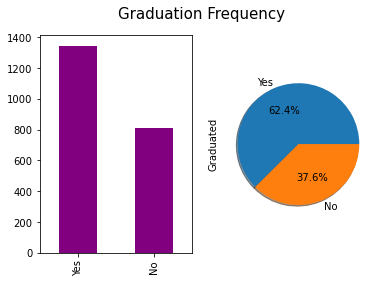

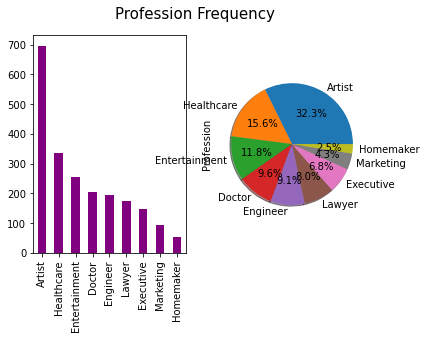

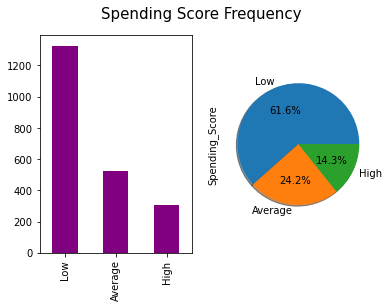

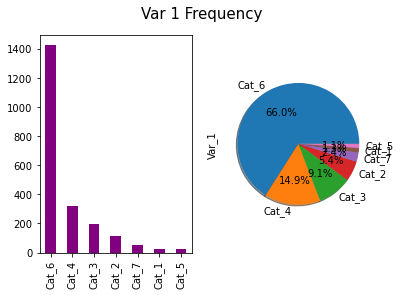

In [29]:
fig, ax = plt.subplots(1, 2)
df["Segmentation"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Segmentation"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Segmentation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["Gender"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Gender"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Gender Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["Ever_Married"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Ever_Married"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Marriage Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["Graduated"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Graduated"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Graduation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["Profession"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Profession"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Profession Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["Spending_Score"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Spending_Score"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Spending Score Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["Var_1"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Var_1"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Var 1 Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

D:\ANA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANA\lib\site-packages\seaborn\distributions.py:261

<AxesSubplot:xlabel='Work_Experience'>

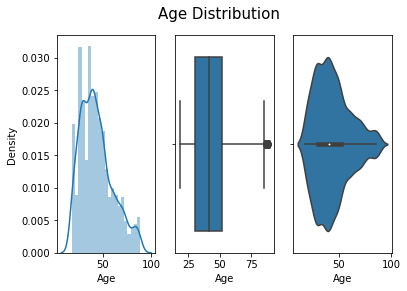

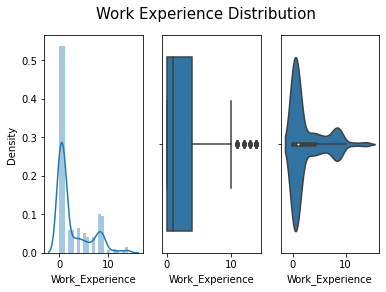

In [30]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Age Distribution", fontsize=15)
sns.distplot(df["Age"], ax=ax[0])
sns.boxplot(df["Age"], ax=ax[1])
sns.violinplot(df["Age"], ax=ax[2])

fig, ax = plt.subplots(1,3)
fig.suptitle("Work Experience Distribution", fontsize=15)
sns.distplot(df["Work_Experience"], ax=ax[0])
sns.boxplot(df["Work_Experience"], ax=ax[1])
sns.violinplot(df["Work_Experience"], ax=ax[2])


D:\ANA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size'>

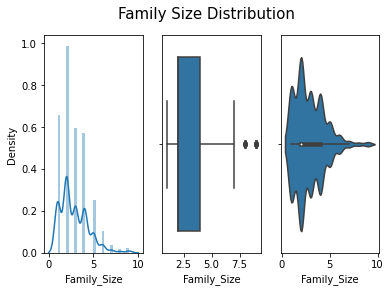

In [31]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Family Size Distribution", fontsize=15)
sns.distplot(df["Family_Size"], ax=ax[0])
sns.boxplot(df["Family_Size"], ax=ax[1])
sns.violinplot(df["Family_Size"], ax=ax[2])


In [32]:
train_df = pd.read_csv("C:\\Users\\Malvika Saxena\\Downloads\\Test.csv")
test_df = pd.read_csv("C:\\Users\\Malvika Saxena\\Downloads\\Test.csv")
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [33]:
def one_hot_encoding(df, COLUMNS_TO_ENCODE=['Gender', 'Ever_Married','Graduated', 'Profession', 'Var_1']):
    encoded_ds = df.copy()
    for column in COLUMNS_TO_ENCODE:
        previous_index = encoded_ds.columns.get_loc(column)
        one_hot_ds = pd.get_dummies(encoded_ds[column], prefix=column)
        for i, one_hot in enumerate(one_hot_ds):
            encoded_ds.insert(previous_index + i, one_hot, one_hot_ds[one_hot])
        del encoded_ds[column]
    return encoded_ds

def integer_encoding(df, COLUMNS_TO_ENCODE=['Spending_Score']):
    encoded_ds = df.copy()
    for column in COLUMNS_TO_ENCODE:
        previous_index = encoded_ds.columns.get_loc(column)
        integer_encoding = encoded_ds[column].astype('category').cat.codes
        encoded_ds[column] = integer_encoding
    return encoded_ds


encoded_ds = one_hot_encoding(train_df)
encoded_ds = encoded_ds.drop(columns = ['ID'])
encoded_ds = integer_encoding(encoded_ds)
encoded_ds.head()

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Age,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Spending_Score,Family_Size,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,1,0,0,1,36,0,1,0,0,1,...,2,1.0,0,0,0,0,0,1,0,B
1,0,1,0,1,37,0,1,0,0,0,...,0,4.0,0,0,0,0,0,1,0,A
2,1,0,0,1,69,1,0,0,0,0,...,2,1.0,0,0,0,0,0,1,0,A
3,0,1,0,1,59,1,0,0,0,0,...,1,2.0,0,0,0,0,0,1,0,B
4,1,0,1,0,19,1,0,0,0,0,...,2,4.0,0,0,0,0,0,1,0,A


In [34]:
encoded_ds.isna().sum()

Gender_Female                 0
Gender_Male                   0
Ever_Married_No               0
Ever_Married_Yes              0
Age                           0
Graduated_No                  0
Graduated_Yes                 0
Profession_Artist             0
Profession_Doctor             0
Profession_Engineer           0
Profession_Entertainment      0
Profession_Executive          0
Profession_Healthcare         0
Profession_Homemaker          0
Profession_Lawyer             0
Profession_Marketing          0
Work_Experience             269
Spending_Score                0
Family_Size                 113
Var_1_Cat_1                   0
Var_1_Cat_2                   0
Var_1_Cat_3                   0
Var_1_Cat_4                   0
Var_1_Cat_5                   0
Var_1_Cat_6                   0
Var_1_Cat_7                   0
Segmentation                  0
dtype: int64

In [36]:
sklearn_random_state = 0
TEST_SIZE = 0.2

In [37]:
COLUMNS_TO_CLEAN = ['Work_Experience', 'Family_Size']
PREDICTED_COLUMN = 'Segmentation'
scaler = StandardScaler()
    
def prepare_data(ds, to_fillna=True):
    ds = ds.copy()
    for column in COLUMNS_TO_CLEAN:
        ds[column] = ds[column].fillna(ds[column].mean())
    ds.isna().sum()
    
    X, Y = ds.drop(PREDICTED_COLUMN, axis=1), ds[PREDICTED_COLUMN]
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=TEST_SIZE, random_state=sklearn_random_state)
    X_train = scaler.fit_transform(X_train.values)
    X_test = scaler.fit_transform(X_test.values)
    #     Y_train = scaler.fit_transform(Y_train.values)
    #     Y_test = scaler.fit_transform(Y_test.values)
    
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = prepare_data(encoded_ds)

In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [40]:
le = LabelEncoder()
le.fit(Y_train)
y_train_labels = le.transform(Y_train)
y_test_labels = le.transform(Y_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [43]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.32509505703422054


In [44]:
feature_names = encoded_ds.columns[:-1]
feature_imp = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

Age                         0.320500
Work_Experience             0.168077
Family_Size                 0.136188
Spending_Score              0.036264
Var_1_Cat_6                 0.031943
Profession_Artist           0.023604
Gender_Female               0.023512
Var_1_Cat_4                 0.023331
Gender_Male                 0.023276
Var_1_Cat_3                 0.018987
Profession_Entertainment    0.018234
Profession_Doctor           0.017494
Graduated_Yes               0.017361
Graduated_No                0.017355
Profession_Engineer         0.016344
Var_1_Cat_2                 0.013995
Profession_Healthcare       0.013939
Ever_Married_Yes            0.013143
Ever_Married_No             0.012170
Profession_Marketing        0.011073
Profession_Executive        0.009787
Profession_Homemaker        0.008853
Var_1_Cat_7                 0.008225
Profession_Lawyer           0.007572
Var_1_Cat_1                 0.005369
Var_1_Cat_5                 0.003404
dtype: float64

In [45]:
clf=RandomForestClassifier(n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=10, bootstrap=True)
clf.fit(X_train,y_train_labels)
Y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test_labels, Y_pred))
confusion_matrix(y_test_labels, Y_pred)

Accuracy: 0.3403041825095057


array([[108,   4,   8,  38],
       [ 78,   9,  10,  25],
       [ 68,   6,  10,  16],
       [ 78,   7,   9,  52]], dtype=int64)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train_labels)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print(accuracy_score(y_train_labels, y_train_pred))
confusion_matrix(y_train_labels, y_train_pred)

0.3783912422655878


array([[578,   0,   0, 110],
       [366,   0,   0,  62],
       [340,   0,   0,  32],
       [396,   0,   0, 217]], dtype=int64)

In [49]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=10, min_samples_leaf=50)
dt.fit(X_train, y_train_labels)

y_test_pred = dt.predict(X_test)

print(accuracy_score(y_test_labels, y_test_pred))
confusion_matrix(y_test_labels, y_test_pred)

0.32129277566539927


array([[94, 23,  8, 33],
       [86, 18,  4, 14],
       [67, 13,  9, 11],
       [81, 14,  3, 48]], dtype=int64)

In [ ]:
from sklearn.decomposition import PCA

for i in range(10):
    n_components = int((i+1)/10*X_train.shape[1])
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_compose = pca.transform(X_train)
    X_comp = pca.transform(X_test)

    clf=RandomForestClassifier(n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=10, bootstrap=True)
    clf.fit(X_compose,y_train_labels)
    Y_pred=clf.predict(X_comp)
    print("Accuracy:",accuracy_score(y_test_labels, Y_pred))
    print((i+1)/10)

Accuracy: 0.3231939163498099
0.1
Accuracy: 0.3517110266159696
0.2
Accuracy: 0.3403041825095057
0.3
Accuracy: 0.3403041825095057
0.4
Accuracy: 0.3365019011406844
0.5
Accuracy: 0.344106463878327
0.6
